# Image Segmentation and Histogram Plotting for Lung X-ray Image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the X-ray image
img = cv2.imread('CHNCXR_0621_1.png', 0)
#img = plt.imread('CHNCXR_0004_0.png',0)

# Threshold the image to create a binary mask
ret, mask = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY_INV)

# Perform morphological opening on the mask to remove small noise
kernel = np.ones((7, 7), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Perform morphological closing on the mask to fill in any holes
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Plot histograms for each image
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Plot histogram for original image
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[1, 0].hist(img.ravel(), 256, [0, 256])
ax[1, 0].set_title('Histogram')

# Plot histogram for binary mask
ax[0, 1].imshow(mask, cmap='gray')
ax[0, 1].set_title('Binary Mask')
ax[1, 1].hist(mask.ravel(), 256, [0, 256])
ax[1, 1].set_title('Histogram')

# Plot histogram for segmented lung
ax[0, 2].imshow(closing, cmap='gray')
ax[0, 2].set_title('Segmented Lung')
ax[1, 2].hist(closing.ravel(), 256, [0, 256])
ax[1, 2].set_title('Histogram')

plt.show()
plt.savefig('obs.png')

In [2]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

The cv2 library is used for image processing, numpy is used for array manipulation, and matplotlib is used for visualizing images

In [3]:
# Load the X-ray image
img = cv2.imread('CHNCXR_0621_1.png', 0)


This line loads an image named 'CHNCXR_0621_1.png' as a grayscale image (0 indicates grayscale).

(Text(0.5, 1.0, 'Original Image'), ([], []), ([], []))

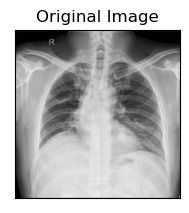

In [4]:
# Display the original image
plt.subplot(221),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

In [6]:
# Threshold the image to create a binary mask
ret, mask = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY_INV)

This line applies thresholding to the image. All pixels below the threshold value of 140 are set to 0, and all pixels above the threshold value are set to 255. The cv2.THRESH_BINARY_INV flag inverts the binary mask.


In the context of this code, the cv2.threshold function is used to create a binary mask of the input image, where all pixels below a certain threshold value are set to 0 and all pixels above that threshold value are set to 255. The cv2.THRESH_BINARY_INV flag is used to invert this binary mask, so that the regions of interest in the input image are represented by 255 (white pixels) and the background is represented by 0 (black pixels).

In other words, the cv2.THRESH_BINARY_INV flag is used to create a mask that isolates the regions of interest in the image (in this case, the lung region) by setting all other pixels to 0. This is a common step in image segmentation tasks, where the goal is to separate different regions of an image for further processing or analysis.




(Text(0.5, 1.0, 'Binary Mask'), ([], []), ([], []))

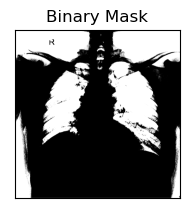

In [7]:
# Display the binary mask
plt.subplot(222),plt.imshow(mask, cmap='gray')
plt.title('Binary Mask'), plt.xticks([]), plt.yticks([])

In [8]:
# Perform morphological opening on the mask to remove small noise
kernel = np.ones((7, 7), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

This line performs morphological opening on the binary mask. Morphological opening is a method for removing small noise in an image. The kernel variable defines the shape and size of the structuring element used for the operation.

In [9]:
# Perform morphological closing on the mask to fill in any holes
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

This line performs morphological closing on the image to fill in any holes. Morphological closing is a method for filling in small holes in an image.